In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import unicodecsv as csv
import warnings
import scipy.stats
from operator import itemgetter
warnings.filterwarnings("ignore")

In [2]:
def graph_func(path):
    graph=nx.Graph(name="Glastonbury")
    with open(path,'rb') as data:
        reader=csv.reader(data)
        for row in reader:
            graph.add_edge(*row)
    return graph

In [3]:
G=graph_func("E://Slides/Term 2/DMSN/Course work/Glastonbury_Final/AD/glaston_AD_edges.csv")

In [4]:
G.order()

4557

In [5]:
G.nodes()

NodeView(('Source', 'Target', '4077', '1445', '1312', '1935', '2069', '2612', '1156', '333', '717', '699', '4489', '3933', '4196', '1010', '1570', '175', '3934', '4153', '1541', '3870', '2207', '2232', '1433', '1663', '3048', '4179', '1589', '1665', '3975', '2693', '4003', '1579', '331', '217', '1941', '1945', '1943', '3503', '324', '4420', '925', '3033', '1522', '2004', '3549', '1197', '2678', '3952', '4191', '2511', '4171', '1258', '910', '3339', '3345', '3350', '2379', '1164', '1728', '1091', '317', '3805', '3164', '1362', '293', '3235', '849', '3727', '3953', '1440', '1466', '1084', '2087', '2214', '3432', '1361', '3234', '3658', '3425', '1834', '2075', '3216', '340', '1469', '425', '4094', '2430', '1018', '1006', '2231', '3553', '2524', '52', '643', '3892', '2323', '1659', '2794', '4362', '28', '2521', '1533', '2891', '3443', '2307', '893', '2845', '4051', '4208', '2711', '2554', '813', '2709', '2316', '1386', '466', '2922', '2596', '3109', '1382', '2392', '2735', '4506', '190', '

In [6]:
G.edges()

EdgeView([('Source', 'Target'), ('4077', '1445'), ('4077', '1312'), ('1445', '1312'), ('1312', '2087'), ('1312', '2214'), ('1312', '3432'), ('1312', '1361'), ('1312', '3234'), ('1312', '3658'), ('1312', '3425'), ('1312', '4051'), ('1312', '4208'), ('1312', '2711'), ('1312', '2554'), ('1312', '813'), ('1312', '3339'), ('1312', '2709'), ('1312', '2430'), ('1312', '2316'), ('1312', '2596'), ('1312', '3109'), ('1312', '1382'), ('1312', '2392'), ('1312', '1829'), ('1312', '2777'), ('1312', '4043'), ('1312', '674'), ('1312', '211'), ('1312', '3455'), ('1312', '1819'), ('1312', '4286'), ('1312', '792'), ('1312', '3369'), ('1312', '1869'), ('1312', '4292'), ('1312', '3813'), ('1312', '1589'), ('1312', '1570'), ('1312', '1035'), ('1312', '3822'), ('1312', '378'), ('1312', '3461'), ('1312', '3061'), ('1312', '2170'), ('1312', '722'), ('1312', '1536'), ('1312', '1783'), ('1312', '2259'), ('1312', '3693'), ('1312', '1788'), ('1312', '2148'), ('1312', '3820'), ('1312', '2147'), ('1312', '1767'), ('

In [7]:
nx.info(G)

'Name: Glastonbury\nType: Graph\nNumber of nodes: 4557\nNumber of edges: 15644\nAverage degree:   6.8659'

In [8]:
print(nx.info(G))

Name: Glastonbury
Type: Graph
Number of nodes: 4557
Number of edges: 15644
Average degree:   6.8659


In [ ]:
#Erdos Renyi RG
n = 4557
p = 0.05

G = nx.gnp_random_graph(n,p)
nx.draw(G, node_size=30)

print("Clustering Coefficient: %f "%nx.average_clustering(G))
print("Average Degree: %f" %np.mean([G.degree(n) for n in G.nodes()]))

Clustering Coefficient: 0.694971 
Average Degree: 6.865921


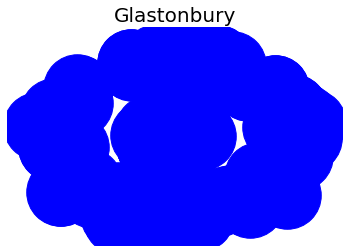

In [9]:
no_nodes = len(G.nodes())
no_edges = len(G.edges())

plt.title("Glastonbury",fontsize=20)
nx.draw(G,node_size=4557,node_color='blue')
print("Clustering Coefficient: %f "%nx.average_clustering(G))
print("Average Degree: %f" %np.mean([G.degree(n) for n in G.nodes()]))
plt.show()

Clustering Coefficient: 0.001291 
Average Degree: 6.765855


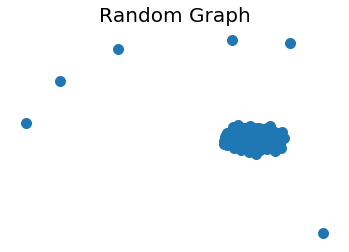

In [10]:
no_nodes = len(G.nodes())
no_edges = len(G.edges())

p = 2.0*no_edges/(no_nodes*no_nodes)

H = nx.gnp_random_graph(no_nodes,p)
plt.title("Random Graph",fontsize=20)
nx.draw(H,node_size=100)
print("Clustering Coefficient: %f "%nx.average_clustering(H))
print("Average Degree: %f" %np.mean([H.degree(n) for n in H.nodes()]))
plt.show()

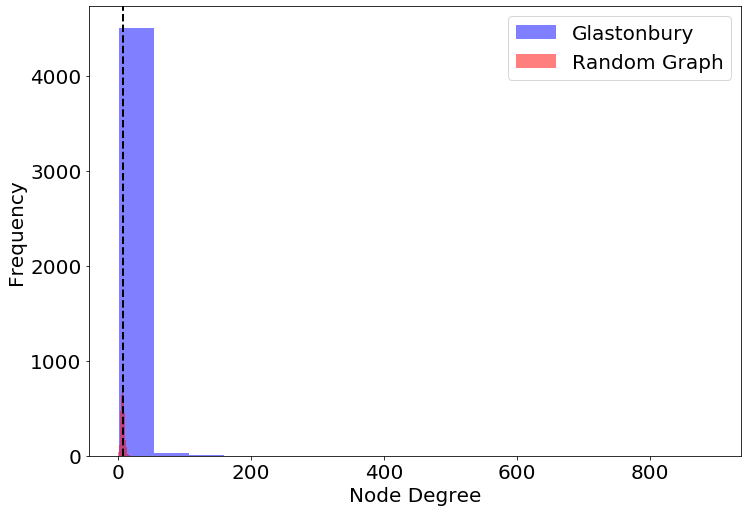

In [11]:
#Degree based statistics
degrees_G = [d for n, d in G.degree()]
degrees_H = [d for n, d in H.degree()]

avg_deg = 2.0 * no_edges/no_nodes

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel('Node Degree',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(labelsize=20)

plt.axvline(x=avg_deg, linewidth=2, linestyle='--', color='black')

plt.hist(degrees_G,bins=17,label="Glastonbury",alpha=0.5,color='blue')
plt.hist(degrees_H,bins=17,label='Random Graph',alpha=0.5,color='red')
plt.legend(loc='upper right',fontsize=20)
plt.show()

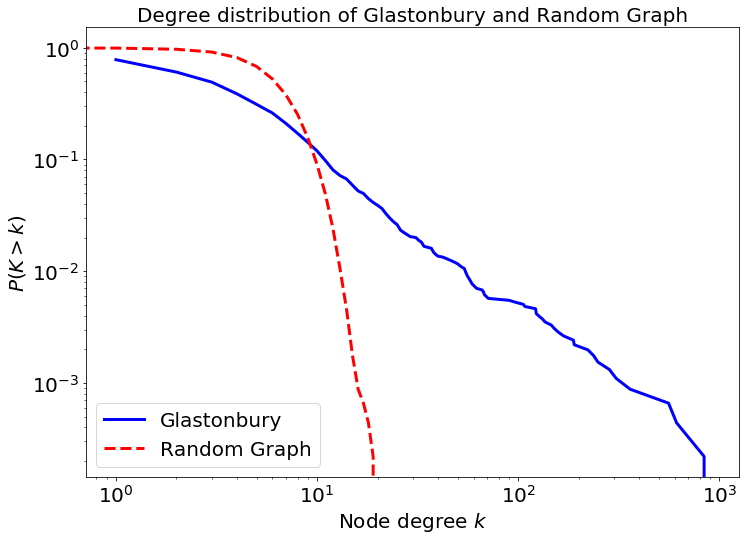

In [12]:
#CCDF tail distribution
degree_sequence = sorted([d for n, d in G.degree()])  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cdf = np.array([c for c in cnt]).cumsum(0)
cdf = cdf/float(cdf[-1])
ccdf = 1-cdf

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
plt.xlabel('Node degree $k$',fontsize=20)
plt.ylabel('$P(K>k)$',fontsize=20)
plt.tick_params(labelsize=20)

plt.xscale('log')
plt.yscale('log')
plt.plot(deg,ccdf,label = 'Glastonbury',linewidth=3,color='blue')

no_nodes = 4557
no_edges = 15644

H = nx.gnm_random_graph(4557,15644)
degree_sequence = sorted([d for n, d in H.degree()])  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cdf = np.array([c for c in cnt]).cumsum(0)
cdf = cdf/float(cdf[-1])
ccdf = 1-cdf
plt.plot(deg,ccdf,label = 'Random Graph',linewidth=3,linestyle='--',color='red')
plt.legend(loc='lower left',fontsize=20)
plt.title("Degree distribution of Glastonbury and Random Graph",fontsize=20)

plt.show()

In [13]:
#Clustering coefficient
clusters_G = list(nx.clustering(G).values())
avg_cluster_G = sum(clusters_G)/float(no_nodes)
clusters_H = list(nx.clustering(H).values())
avg_cluster_H = sum(clusters_H)/float(no_nodes)

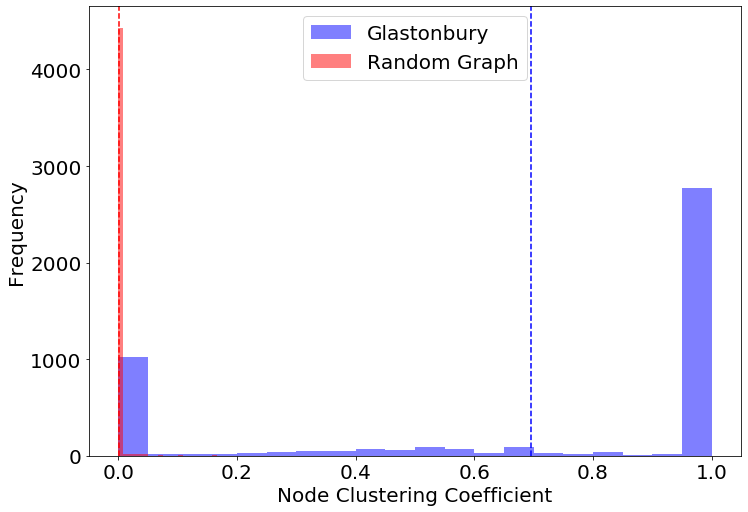

In [14]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel('Node Clustering Coefficient',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(labelsize=20)

plt.hist(clusters_G,bins=20,label="Glastonbury",alpha=0.5,color='blue')
plt.hist(clusters_H,bins=20,label='Random Graph',alpha=0.5,color='red')

plt.axvline(x=avg_cluster_G, linestyle='--', color='blue')
plt.axvline(x=avg_cluster_H, linestyle='--', color='red')

plt.legend(loc='upper center',fontsize=20)

plt.show()

In [15]:
#Path length and diameter
def get_path_lengths(graph):
    lengths = []
    for i in range(G.number_of_nodes()):
        for j in range(i):
            lengths.append(len(nx.shortest_path(graph,i,j))-1)
    return lengths

path_lengths_G = get_path_lengths(G)
path_lengths_H = get_path_lengths(H)

NodeNotFound: Either source 1 or target 0 is not in G

In [16]:
avg_path_G = sum(path_lengths_G)/float(len(path_lengths_G))
avg_path_H = sum(path_lengths_H)/float(len(path_lengths_H))

NameError: name 'path_lengths_G' is not defined

In [ ]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel('Path Length',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

plt.hist(path_lengths_G,bins=4,label="Glastonbury",alpha=0.5,color='blue')
plt.hist(path_lengths_H,bins=4,label='Random Graph',alpha=0.5,color='red')

plt.axvline(x=avg_path_G, linestyle='--', color='blue')
plt.axvline(x=avg_path_H, linestyle='--', color='red')

plt.legend(loc='upper right',fontsize=20)

plt.show()